# **Laboratorio 5: Máquinas de Soporte Vectorial**

David Cardenas Peña, PhD.

Edificio de Ingeniería Eléctrica, Oficina 1B-131

email: dcardenasp@utp.edu.co

## Objetivos del laboratorio:

*    Identificar los elementos de las máquinas de soporte vectorial y su labor.
*   Apropiarse de una estrategia de sintonización de parámetros libres de los modelos empleando técnicas de validación.




In [1]:
import numpy as np
from time import sleep

from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs,  load_digits
from sklearn.model_selection import train_test_split, StratifiedKFold
from IPython.display import clear_output
import matplotlib.pyplot as plt


## Funciones auxiliares

Crean las bases de datos y hacen las gráficas

In [2]:
def linear():
  X, y = make_blobs(n_samples=100, centers=2, random_state=6)
  
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  

  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)
  
  return X_train,y_train,X_test,y_test,X_grid

def easy():
  #Load database
  X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
  rng = np.random.RandomState(50)
  X += 3 * rng.uniform(size=X.shape)
  
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)
  
  return X_train,y_train,X_test,y_test,X_grid


def moons():
  #Load database
  X, y = make_moons(noise=0.2, random_state=10,n_samples=400)
  
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  


  N = X_train.shape[0]
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)
  
  return X_train,y_train,X_test,y_test,X_grid

def blobs():
  #Load database
  X, y = make_blobs(n_samples=200, centers=2, random_state=0)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  
  
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)

  return X_train,y_train,X_test,y_test,X_grid

def three_blobs():
  #Load database
  X, y = make_blobs(n_samples=500, centers=3, random_state=2)
  y = y==2

  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  

  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)
  
  return X_train,y_train,X_test,y_test,X_grid

def circles():
  #Load database
  X, y = make_circles(n_samples=1000, factor=.5,  noise=.1)
  test_size = 1/3;
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)  
  
  #Data grid to evaluate:
  xmin = X_train.min(0)
  xmax = X_train.max(0)
  x1 = np.linspace(xmin[0], xmax[0], 1000) #Malla de puntos para la variable x1
  x2 = np.linspace(xmin[1], xmax[1], 1000) #Malla de puntos para la variable x2
  X1, X2 = np.meshgrid(x1, x2) #Malla de puntos bi-dimensional
  #Datos para evaluar:
  X_grid = np.concatenate((X1.reshape(-1,1),X2.reshape(-1,1)),axis=1)
  
  return X_train,y_train,X_test,y_test,X_grid

def plot_svm(X_train,t_train,X_test,t_test,X_grid=None,y_grid=None,boundaries=None,supports=None):

  if X_grid is not None:
    X1 = X_grid[:,0].reshape([1000,1000])
    X2 = X_grid[:,1].reshape([1000,1000])
    cs = plt.contour(X1, X2, y_grid.reshape(X1.shape),boundaries)
    plt.clabel(cs, inline=True, fontsize=10)
  
  plt.scatter(X_train[:,0], X_train[:,1], c=t_train , cmap=plt.cm.Paired ,label='Train',marker='o',facecolors='none',s=30)
  plt.scatter(X_test[:,0], X_test[:,1], c=t_test , cmap=plt.cm.Paired ,label='Test',marker='x',s=30)

  if supports is not None:
    plt.scatter(supports[:,0],supports[:,1],facecolors='none', edgecolors='k',label='supports')

  plt.legend()
  
  plt.show()
  
  return

def plot_mnist(X,t,y,ind):
  img = X.iloc[ind,:].to_numpy().reshape(28,28)
  plt.imshow(img,cmap=plt.get_cmap('gray'))
  plt.title('Label: {}, Prediction: {}'.format(t[ind],y[ind]))
  plt.show()

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


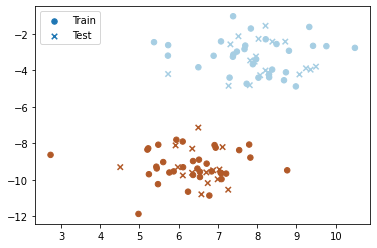

(66, 2) (66,) (34, 2) (34,) (1000000, 2)


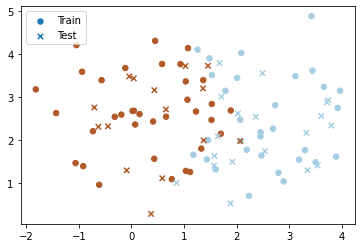

(266, 2) (266,) (134, 2) (134,) (1000000, 2)


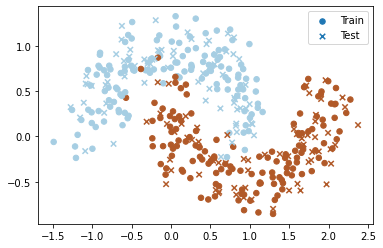

(133, 2) (133,) (67, 2) (67,) (1000000, 2)


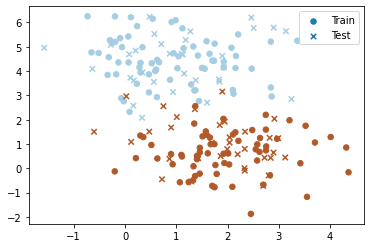

(333, 2) (333,) (167, 2) (167,) (1000000, 2)


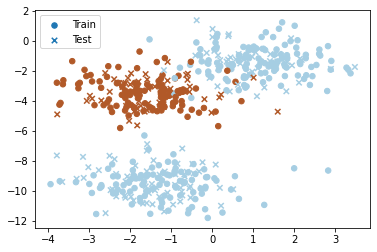

(666, 2) (666,) (334, 2) (334,) (1000000, 2)


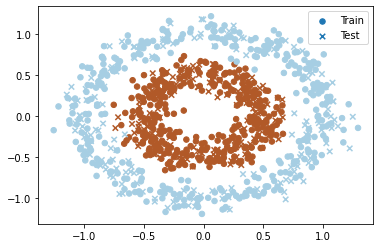

In [3]:
for X_train,t_train,X_test,t_test,X_grid in [linear(),easy(),moons(),blobs(),three_blobs(),circles()]:
  
  print(X_train.shape,t_train.shape,X_test.shape,t_test.shape,X_grid.shape)
  plot_svm(X_train,t_train,X_test,t_test)

# Actividad 1:

Consulte cómo usar el módulo Support Vector Machine de scikit-learn
(sklearn.svm.SVC) para entrenar clasificadores SVM. 

¿Cómo se usan los métodos fit() y decision_function()? 

¿Qué información proveen los atributos coef_, dual_coef_, n_support_ y support_vectors_?

¿Qué tipo de kernels acepta el módulo SVM de scikit-learn? ¿Cuáles son
sus parámetros y qué significan?

*   ¿Cómo se usan los métodos fit() y decision_function()?

El metodo fit() ajust el modelo SVM según los datos de entrenamiento dados. Le pasamos los parametros X({matriz-como, matriz dispersa} de forma (n_samples, n_features) o (n_samples, n_samples), y(matriz-como de forma (n_samples,)) lo cual nos devolvera objeto self:

El metodo decision_function() evalúa la función de decisión para las muestras en X. Le pasamos el parametro X(matriz-como de forma (n_samples, n_features)) y nos devuelve X(ndarray de forma (n_samples, n_classes * (n_classes-1) / 2)).

En el siguiente bloque de codigo se deja un codigo de muestra que se consigue en la pagina de documentación de sklearn.



In [4]:
import numpy as np
from sklearn import svm
from sklearn.svm import SVC

X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)
SVC(decision_function_shape='ovo')
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6
6
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes
4

4

# Actividad 2:

Use el módulo Support Vector Machine de scikit-learn (sklearn.svm.SVC) para entrenar una SVM de clasificación con kernel **lineal** y **C=1**. 

Grafique:
1.   Los vectores de soporte
2.   La frontera de  decisión
3.   La margen

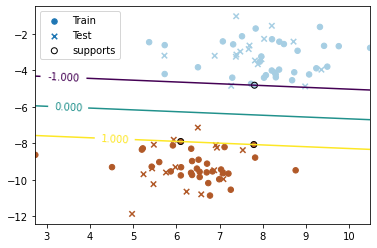

In [5]:
X_train,t_train,X_test,t_test,X_grid = linear()

from sklearn import svm

clf = svm.SVC(kernel="linear", C=1.0)
clf.fit(X_train, t_train)
SVC

y_grid = clf.decision_function(X_grid) #Resultado de decision_function en X_grid

supports = clf.support_vectors_ # Resultado del atributo support_vectors_

boundaries = [-1, 0, 1] #Tres valores, uno para la margen izquierda, otro para la frontera y otro para la margen derecha

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)


# Actividad 3:
A partir la actividad 2, reduzca el valor de la restricción $C$ paulatinamente hasta 0.01. Deben de probar varios valores de $C\in[0.01,1]$, los pasos lo deciden ustedes. 

Grafique Los multiplicadores de lagrange del problema dual en un `stem` usando diferentes valores de $C$.

**NOTA**: Debe hacer `reshape(-1,)` a los multiplicadores para que el método `stem` funcione.

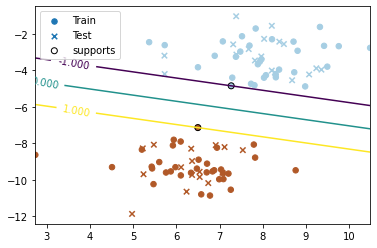

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


<StemContainer object of 3 artists>

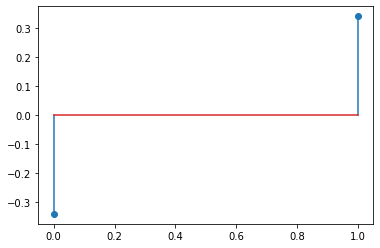

In [6]:
X_train,t_train,X_test,t_test,X_grid = linear()

clf = svm.SVC(kernel="linear", C=0.7)
clf.fit(X_train, t_train)
SVC

y_grid = clf.decision_function(X_grid)

supports = clf.support_vectors_

boundaries = [-1,0,1]

stem = clf.dual_coef_.reshape(-1,)

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

plt.stem(stem)

# Actividad 4:
Para la base de datos cargada acontinuación, entrene una `SVM` con kernnel `rbf` y un valor de regularización `C=1`. Grafique:
*   La margen (con el método `decision_function`) para los datos `X_grid`.
*   Los vectores de soporte.

Cambie el factor de escala `gamma` de `1e-5` a `150`, los pasos lo escogen ustedes.


gamma:1e-05


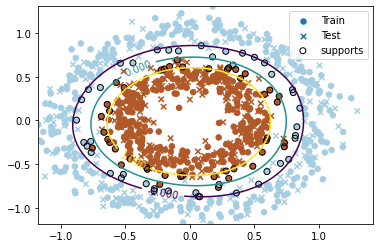

gamma:0.01


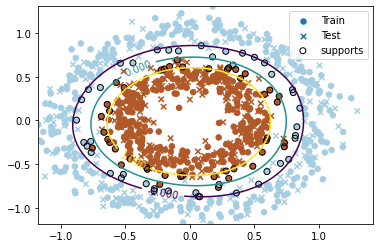

gamma:1


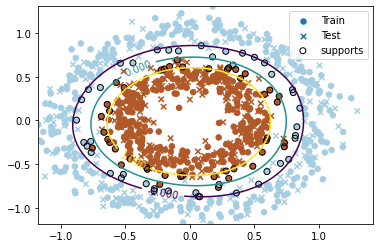

gamma:10


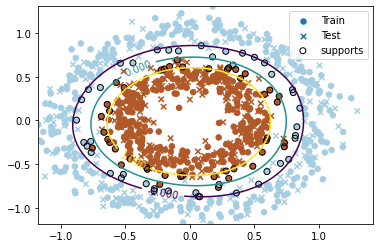

gamma:50


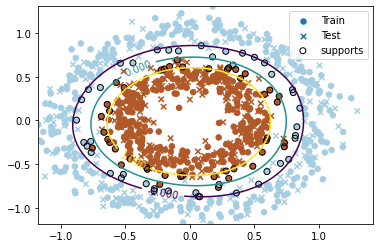

gamma:100


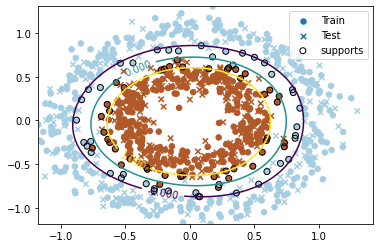

gamma:150


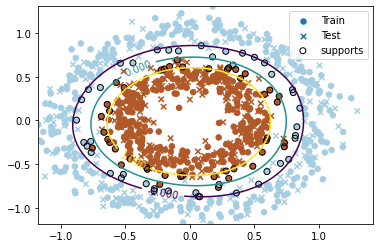

In [7]:
X_train,t_train,X_test,t_test,X_grid = circles()

for gamma in [1e-5, 1e-2, 1, 10, 50, 100, 150]: #Defina la lista de gammas a evaluar
  
  clf = svm.SVC(kernel="rbf", C=1.0)
  clf.fit(X_train, t_train)

  supports = clf.support_vectors_
  
  y_grid = clf.decision_function(X_grid)
  
  print('gamma:{}'.format(gamma))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

# Actividad 5:

Para cada una de las siguientes bases de datos:

* Entrene una SVM con **kernel lineal**  con el subconjunto de train. 

* Entrene una SVM con **kernel RBF**  con el subconjunto de train. 

* Ajuste los parámetros C (para los dos kernels) y gamma (para el kernel RBF) mediante una búsqueda en rejilla en validación cruzada (`gridsearchCV`).

* Grafique para los dos kernels la frontera de clasificación, las márgenes y los vectores de soporte.

* Imprima para los dos kernels el acierto de clasificación (`score`) en el subconjunto de test.

In [8]:
from sklearn.model_selection import GridSearchCV

{'C': 2.0417959183673466, 'kernel': 'linear'}
2.0417959183673466


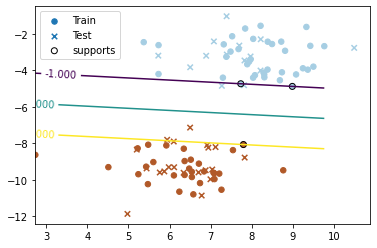


Score: 1.0


In [9]:
X_train,t_train,X_test,t_test,X_grid = linear()

params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 2.0417959183673466, 'gamma': 'auto', 'kernel': 'rbf'}
2.0417959183673466
auto
gamma:150


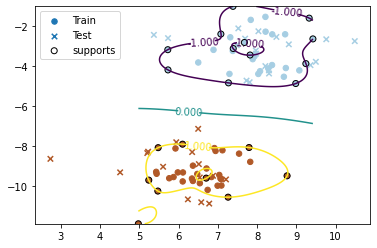


Score: 1.0


In [10]:
X_train,t_train,X_test,t_test,X_grid = linear()

params = {'C': np.linspace(1e-3, 100, 50),
        'kernel': ['rbf'],
        'gamma': ['auto']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

gamm = results['gamma']
print(gamm)
  
clf = svm.SVC(kernel="rbf", C=Cop, gamma=gamm)
clf.fit(X_train, t_train)

supports = clf.support_vectors_

y_grid = clf.decision_function(X_grid)

print('gamma:{}'.format(gamma))

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 4.082591836734694, 'kernel': 'linear'}
4.082591836734694


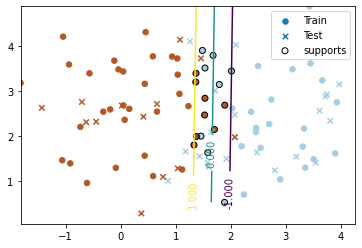


Score: 0.8939393939393939


In [11]:
X_train,t_train,X_test,t_test,X_grid = easy()

params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 10.204979591836734, 'gamma': 'auto', 'kernel': 'rbf'}
10.204979591836734
auto
gamma:10


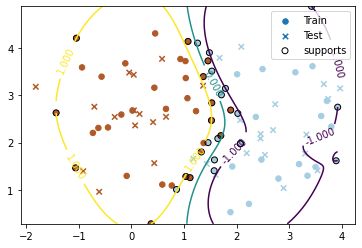


Score: 0.9090909090909091


In [12]:
X_train,t_train,X_test,t_test,X_grid = easy()

for gamma in [10]: #Defina la lista de gammas a evaluar
  
  params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['rbf'],
          'gamma': ['auto']}

  clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
  clf.fit(X_train, t_train)

  results = clf.best_params_
  print(clf.best_params_)

  Cop = results['C']
  print(Cop)

  gamm = results['gamma']
  print(gamm)
    
  clf = svm.SVC(kernel="rbf", C=Cop, gamma=gamm)
  clf.fit(X_train, t_train)

  supports = clf.support_vectors_
  
  y_grid = clf.decision_function(X_grid)
  
  print('gamma:{}'.format(gamma))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

  print()
  
  print("Score:",clf.score(X_train, t_train))

{'C': 6.123387755102041, 'kernel': 'linear'}
6.123387755102041


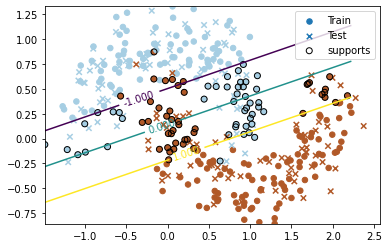


Score: 0.8759398496240601


In [13]:
X_train,t_train,X_test,t_test,X_grid = moons()

params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 6.123387755102041, 'gamma': 'auto', 'kernel': 'rbf'}
6.123387755102041
auto
gamma:10


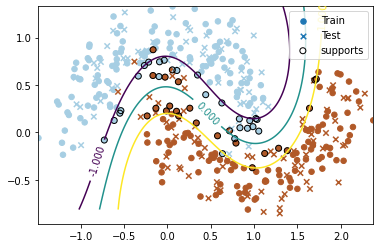


Score: 0.9699248120300752


In [14]:
X_train,t_train,X_test,t_test,X_grid = moons()

params = {'C': np.linspace(1e-3, 100, 50),
        'kernel': ['rbf'],
        'gamma': ['auto']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

gamm = results['gamma']
print(gamm)
  
clf = svm.SVC(kernel="rbf", C=Cop, gamma=gamm)
clf.fit(X_train, t_train)

supports = clf.support_vectors_

y_grid = clf.decision_function(X_grid)

print('gamma:{}'.format(gamma))

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 10.204979591836734, 'kernel': 'linear'}
10.204979591836734


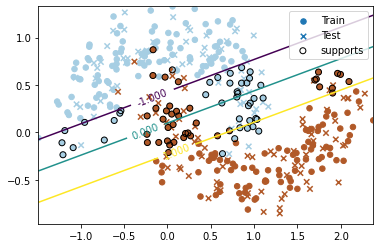


Score: 0.8909774436090225


In [15]:
params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

gamma:50


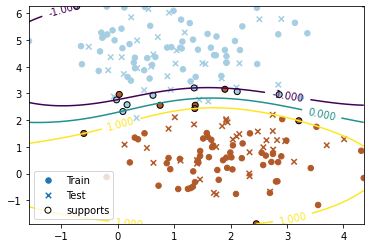

Score: 0.9774436090225563


In [16]:
X_train,t_train,X_test,t_test,X_grid = blobs()

for gamma in [50]: #Defina la lista de gammas a evaluar
  
  clf = svm.SVC(kernel="rbf", C=10)
  clf.fit(X_train, t_train)

  supports = clf.support_vectors_
  
  y_grid = clf.decision_function(X_grid)
  
  print('gamma:{}'.format(gamma))

  plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

  print("Score:",clf.score(X_train, t_train))

{'C': 2.0417959183673466, 'kernel': 'linear'}
2.0417959183673466


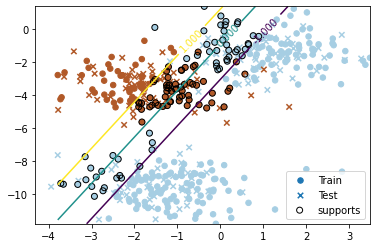


Score: 0.8468468468468469


In [17]:
X_train,t_train,X_test,t_test,X_grid = three_blobs()

params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 14.286571428571426, 'gamma': 'auto', 'kernel': 'rbf'}
14.286571428571426
auto
gamma:50


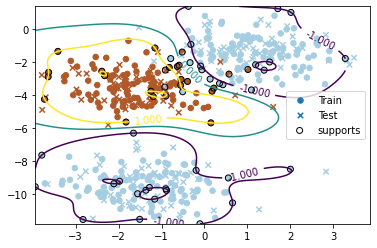


Score: 0.978978978978979


In [18]:
X_train,t_train,X_test,t_test,X_grid = three_blobs()

params = {'C': np.linspace(1e-3, 100, 50),
        'kernel': ['rbf'],
        'gamma': ['auto']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

gamm = results['gamma']
print(gamm)
  
clf = svm.SVC(kernel="rbf", C=Cop, gamma=gamm)
clf.fit(X_train, t_train)

supports = clf.support_vectors_

y_grid = clf.decision_function(X_grid)

print('gamma:{}'.format(gamma))

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 0.001, 'kernel': 'linear'}
0.001


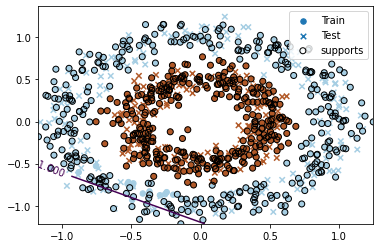


Score: 0.512012012012012


In [19]:
X_train,t_train,X_test,t_test,X_grid = circles()

params = {'C': np.linspace(1e-3, 100, 50),
          'kernel': ['linear']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

clf1 = svm.SVC(kernel='linear', gamma=1, C=Cop)
clf1.fit(X_train, t_train)

y_grid = clf.decision_function(X_grid)

supports = clf1.support_vectors_

boundaries = [-1,0,1]

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

{'C': 4.082591836734694, 'gamma': 'auto', 'kernel': 'rbf'}
4.082591836734694
auto
gamma:50


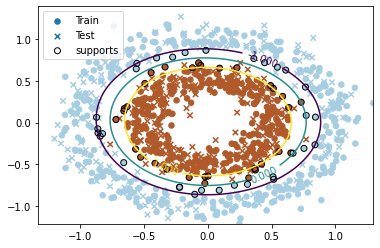


Score: 0.996996996996997


In [20]:
X_train,t_train,X_test,t_test,X_grid = circles()

params = {'C': np.linspace(1e-3, 100, 50),
        'kernel': ['rbf'],
        'gamma': ['auto']}

clf = GridSearchCV(svm.SVC(), param_grid=params, cv = 5, verbose = 0, return_train_score=True)
clf.fit(X_train, t_train)

results = clf.best_params_
print(clf.best_params_)

Cop = results['C']
print(Cop)

gamm = results['gamma']
print(gamm)
  
clf = svm.SVC(kernel="rbf", C=Cop, gamma=gamm)
clf.fit(X_train, t_train)

supports = clf.support_vectors_

y_grid = clf.decision_function(X_grid)

print('gamma:{}'.format(gamma))

plot_svm(X_train,t_train,X_test,t_test,X_grid,y_grid,boundaries,supports)

print()

print("Score:",clf.score(X_train, t_train))

# Actividad 6 (Optical Character Recognition):

Para la base de datos de dígitos escritos a mano, entrene una SVM los clasifique. La función **kernel**, el parámetro de regularización **C** y los hiperparámetros de la función kernel se ran los parámetros libres. Emplee la clase `sklearn.model_selection.GridSearchCV` para explorar difentes configuraciones de parámetros. 

Explore los resultados obtenidos del atributo `cv_results_`.

La base de datos DIGITS contiene 1797 muestras en 64 dimensiones, distribuídas en las clases [0 1 2 3 4 5 6 7 8 9] .


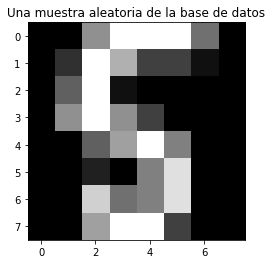

In [21]:
digits = load_digits()
X, y = digits.data, digits.target
print('La base de datos DIGITS contiene',X.shape[0],'muestras en',X.shape[1],'dimensiones, distribuídas en las clases',np.unique(y),'.')
#A random sample:
ind=np.random.randint(low = 0, high = X.shape[0], size = 1);
plt.imshow(X[ind,:].reshape((8,8)),cmap=plt.get_cmap('gray'))
plt.title('Una muestra aleatoria de la base de datos')
plt.show()

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import svm, metrics
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df_train = pd.read_csv('sample_data/mnist_train_small.csv')

t_train = df_train.iloc[:,0]
X_train = df_train.iloc[:,1:]

df_test = pd.read_csv('sample_data/mnist_test.csv')

t_test = df_test.iloc[:,0]
X_test = df_test.iloc[:,1:]

print('La base de datos contiene {} imágenes de entrenamiento y {} de prueba'.format(X_train.shape[0],X_test.shape[0]))

print('Las clases corresponden a dígitos: {} '.format(np.unique(t_train)))

La base de datos contiene 19999 imágenes de entrenamiento y 9999 de prueba
Las clases corresponden a dígitos: [0 1 2 3 4 5 6 7 8 9] 


In [24]:
"""
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)

hiperparametros = [{'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [5,10]}]

model = SVC(kernel="rbf")

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hiperparametros, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

model_cv.fit(X_train, t_train)
"""

'\nfolds = KFold(n_splits = 5, shuffle = True, random_state = 10)\n\nhiperparametros = [{\'gamma\': [1e-2, 1e-3, 1e-4],\n                     \'C\': [5,10]}]\n\nmodel = SVC(kernel="rbf")\n\nmodel_cv = GridSearchCV(estimator = model, \n                        param_grid = hiperparametros, \n                        scoring= \'accuracy\', \n                        cv = folds, \n                        verbose = 1,\n                        return_train_score=True)      \n\nmodel_cv.fit(X_train, t_train)\n'

In [25]:
#cv_results = pd.DataFrame(model_cv.cv_results_)
#cv_results

In [26]:
"""
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))
"""

'\nbest_score = model_cv.best_score_\nbest_hyperparams = model_cv.best_params_\n\nprint("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))\n'

In [34]:
model = svm.SVC(C=10, gamma=0.001, kernel="rbf")
model.fit(X_train, t_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_test = model.predict(X_train)

print("accuracy", metrics.accuracy_score(t_train, y_test), "\n")
print(metrics.confusion_matrix(t_train, y_test), "\n")

accuracy 1.0 

[[1962    0    0    0    0    0    0    0    0    0]
 [   0 2243    0    0    0    0    0    0    0    0]
 [   0    0 1989    0    0    0    0    0    0    0]
 [   0    0    0 2021    0    0    0    0    0    0]
 [   0    0    0    0 1924    0    0    0    0    0]
 [   0    0    0    0    0 1761    0    0    0    0]
 [   0    0    0    0    0    0 2038    0    0    0]
 [   0    0    0    0    0    0    0 2126    0    0]
 [   0    0    0    0    0    0    0    0 1912    0]
 [   0    0    0    0    0    0    0    0    0 2023]] 



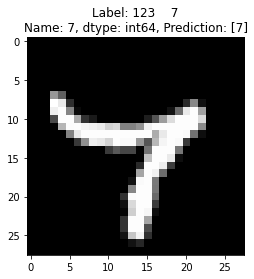

In [47]:
#score_train = model.cv_results_
#score_test = model.cv_results_

#print('Acierto de clasificación para el conjunto de entrenamiento:{}'.format(score_train))

#print('Acierto de clasificación para el conjunto de prueba:{}'.format(score_test))


ind=np.random.randint(low = 0, high = X.shape[0], size = 1);

plot_mnist(X_test,t_test,y_test,ind)

Después de mucho tiempo, no pudimos compilar el modelo con GridSearch, al parecer fue mucho para colab o no realice los parametros adecuados; aun así se deja el codigo documentado por si se logra corrar con otra maquina.